### Cointegration Figures

#### Three cointegrated stocks example

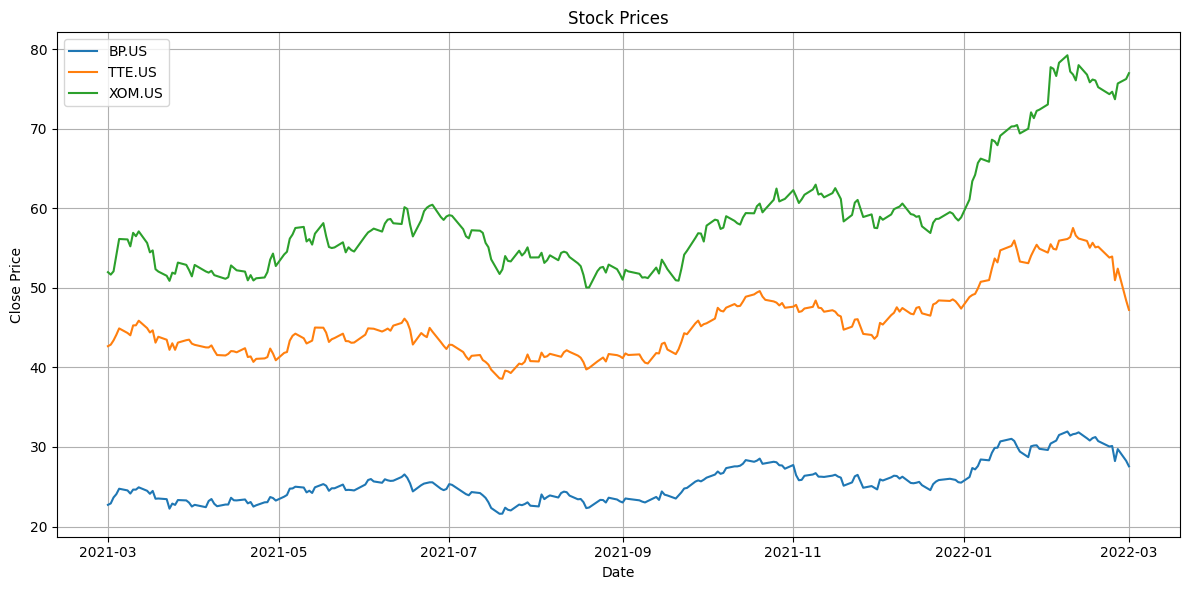

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime

# User input for stock tickers and date range
tickers = ["BP.US", "TTE.US", "XOM.US"]
start_date = "2021-03-01"
end_date = "2022-03-01"

# Download adjusted close prices from Stooq (free, no API key required)
data = pd.DataFrame()
for ticker in tickers:
    try:
        df = web.DataReader(ticker, 'stooq', start=start_date, end=end_date)
        data[ticker] = df['Close'].sort_index()
    except Exception as e:
        print(f"Could not download {ticker}: {e}")

# Plot all stock prices
plt.figure(figsize=(12, 6))
for ticker in tickers:
    if ticker in data:
        plt.plot(data.index, data[ticker], label=ticker)

plt.title("Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### cont. Log of the cumulative returns plot

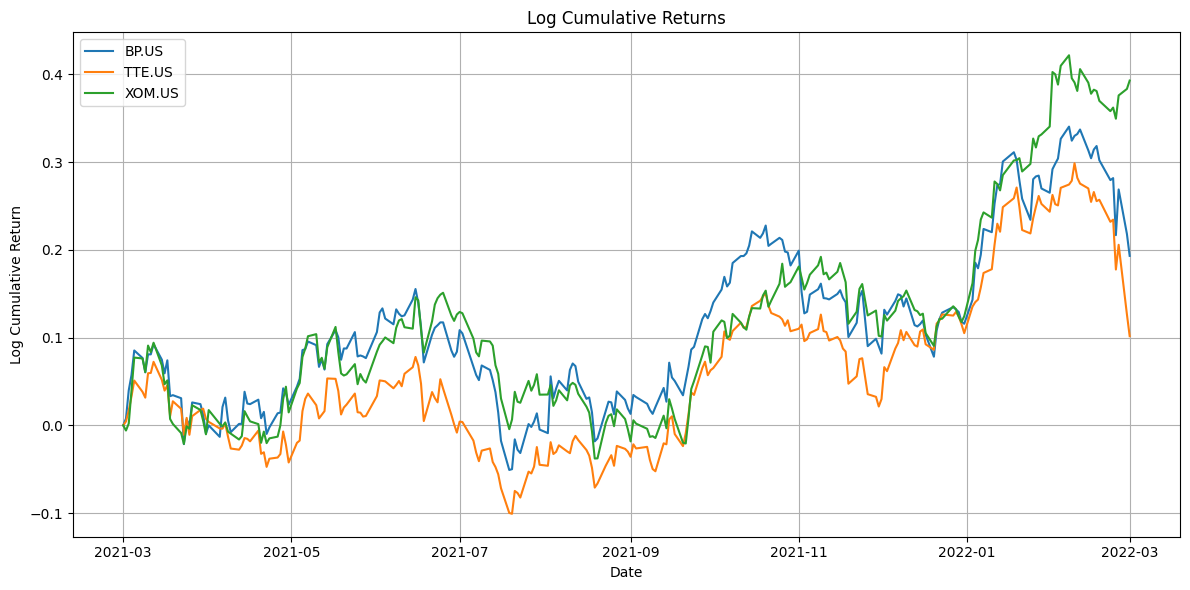

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime

# Download adjusted close prices from Stooq (free, no API key required)
data = pd.DataFrame()
for ticker in tickers:
    try:
        df = web.DataReader(ticker, 'stooq', start=start_date, end=end_date)
        data[ticker] = df['Close'].sort_index()
    except Exception as e:
        print(f"Could not download {ticker}: {e}")

# Calculate log cumulative returns
log_returns = pd.DataFrame()
for ticker in tickers:
    if ticker in data:
        log_returns[ticker] = (data[ticker].apply(lambda x: pd.NA if x <= 0 else x)
                               .dropna()
                               .apply(np.log)
                               .diff()
                               .fillna(0)
                               .cumsum())

# Plot log cumulative returns
plt.figure(figsize=(12, 6))
for ticker in tickers:
    if ticker in log_returns:
        plt.plot(log_returns.index, log_returns[ticker], label=ticker)

plt.title("Log Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Log Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### cont. Three cointegrated residuals

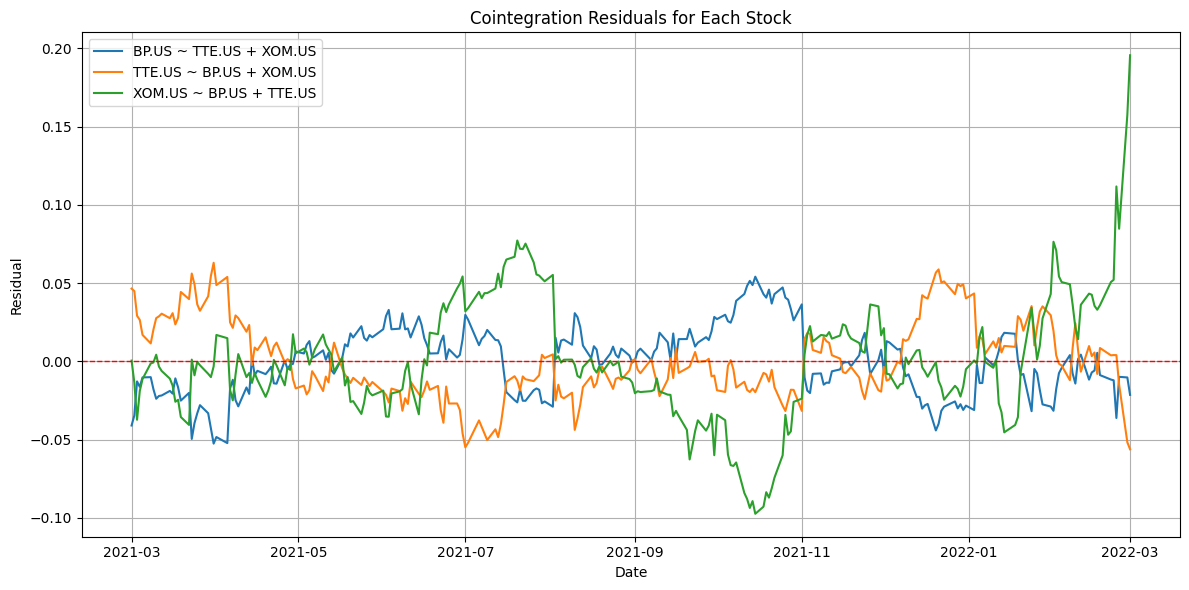

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

# Combine all residuals into a single plot
plt.figure(figsize=(12, 6))
for i, target in enumerate(tickers):
    others = [t for t in tickers if t != target]
    X = log_returns[others]
    X = add_constant(X)
    y = log_returns[target]
    model = OLS(y, X).fit()
    residuals = model.resid
    plt.plot(residuals.index, residuals, label=f"{target} ~ {others[0]} + {others[1]}")

plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Cointegration Residuals for Each Stock")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()